Shortest path calculation between two geographical points

In [1]:
#Supress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import networkx as nx
import osmnx  as ox

In [3]:
#Get the graph of drivable roads from the bounding box, and project it. OSMnx uses EPSG 4326, the projection is EPSG 29615.
G = ox.graph_from_bbox(45, 44.25, -93.37, -96.8, network_type="drive", simplify=True, retain_all=False)
G_proj = ox.project_graph(G)

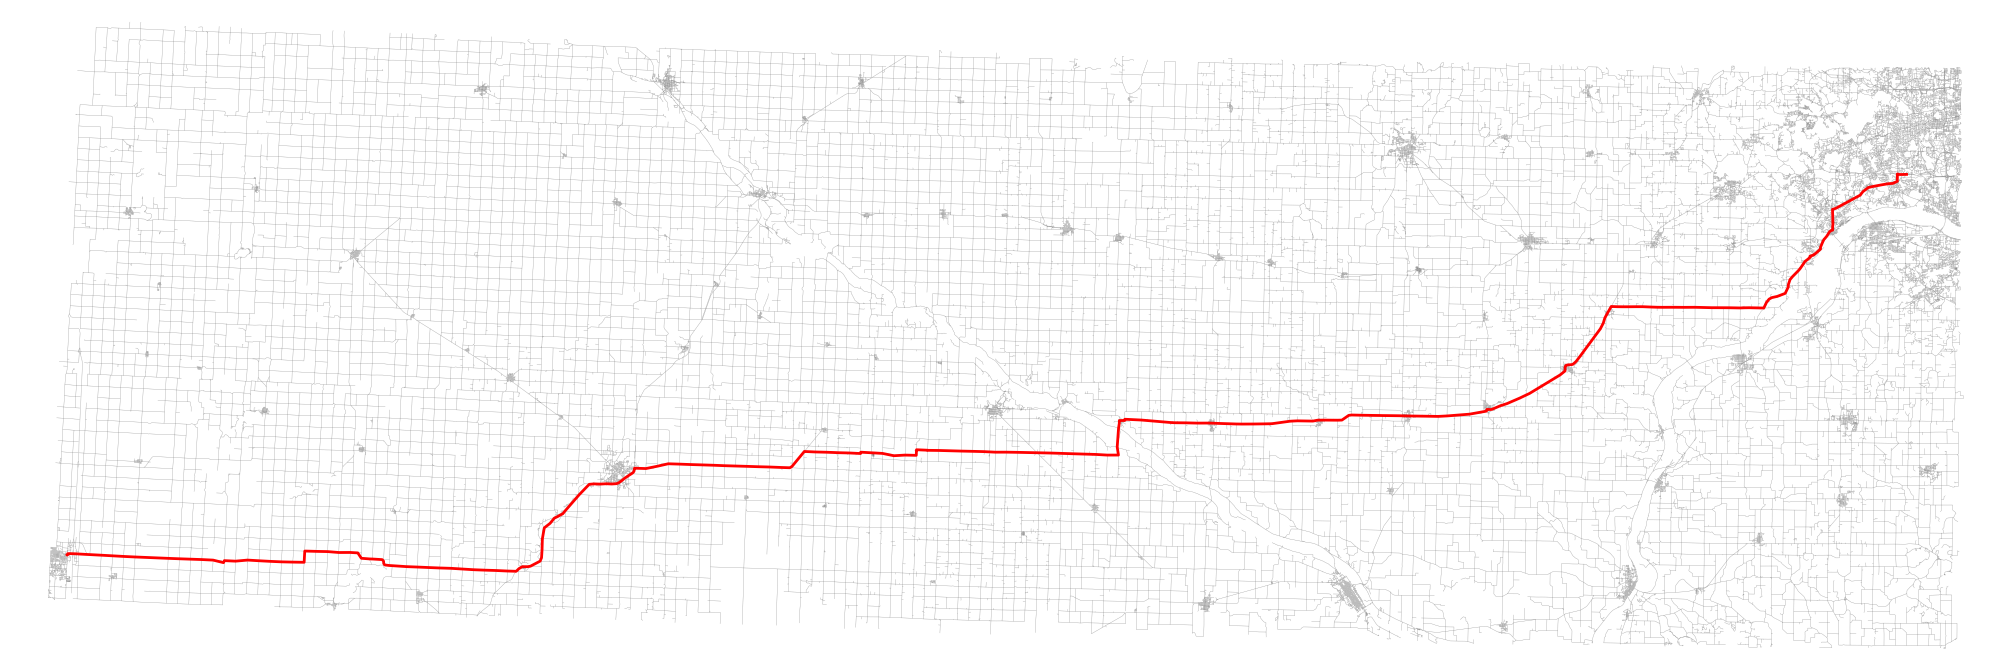

In [4]:
#Convert nodes (intersections) and edges (roads) to geodataframes
nodes, edges = ox.graph_to_gdfs(G_proj, nodes=True, edges=True)

#Distance endpoints in EPSG 29615 and corresponding nodes
pts = (463240, 4967696, 199280, 4913393)
source, target = ox.nearest_nodes(G_proj, pts[0], pts[1]), ox.nearest_nodes(G_proj, pts[2], pts[3])

#Shortest path in the graph
spath = nx.shortest_path(G_proj, source=source, target=target, weight="length")

#Nodes that path goes through and corresponding geometries
spath_nodes = nodes.loc[spath]
spath_line = LineString(list(spath_nodes.geometry.values))

#Shapely path to geodataframe
route = gpd.GeoDataFrame({"geometry" : [spath_line]}, geometry = "geometry", crs=26915)

#Plotting routine
fig, ax = plt.subplots(figsize=(20, 10), constrained_layout=True)
route.plot(ax=ax, lw=2, color="r", zorder=100)
ox.plot_graph(G_proj, edge_color="gray", edge_linewidth=0.2, edge_alpha=0.5, node_size=0, ax=ax)
ax.set_axis_off()